1.1. Обучить модель без каких-либо дополнительных условий, которая должна наилучшим
образом отработать на тестовой выборке с точки зрения F-меры.

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

In [10]:
features = pd.read_csv("./features_train.csv")
target = pd.read_csv("./classes_train.csv")
features

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142
2,704,3108,454,2400,77,0,0,0,1358,0.518409,2.288660,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,72.265781,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,4.279063,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,109,13,2,0,5,0,0,0,788,0.138325,0.016497,0.002538,0.000000,0.006345,6.500000,9,0,9,0,124
2396,5503,3,0,0,2,1,1,0,1382,3.981910,0.002171,0.000000,0.000000,0.001447,23524.000000,10,0,18,0,8
2397,2172,35504,0,2,140,1,1,0,1813,1.198014,19.583012,0.000000,0.001103,0.077220,23524.000000,15,0,16,0,130
2398,2513,19,0,0,4,1,1,0,1274,1.972527,0.014914,0.000000,0.000000,0.003140,23524.000000,14,0,17,0,95


Нормализация

In [11]:
categorical_features_cols = ['is_default_profile', 'is_profile_use_background_image', 'is_verified', 'num_digits_in_screen_name', 'num_digits_in_name']
features = features.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
for col_name in (set(features) - set(categorical_features_cols)):
    features.loc[features[col_name] < 0.01, col_name] = 0.01
features[categorical_features_cols] = features[categorical_features_cols].astype(np.int64)
features

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,0.01,0.010000,0.023878,0.029753,0.010000,0,0,1,0.425783,0.01,0.010000,0.041415,0.041793,0.010000,0.010000,0.750000,0,0.276596,0,0.424419
1,0.01,0.010000,0.012234,0.010000,0.010000,0,1,1,0.793222,0.01,0.010000,0.013003,0.010000,0.010000,0.010000,0.666667,0,0.468085,0,0.825581
2,0.01,0.010000,0.010000,0.010000,0.010000,0,0,0,0.135564,0.01,0.010000,0.012211,0.014544,0.010000,0.010000,0.750000,0,0.361702,0,0.523256
3,0.01,0.016471,0.010000,0.010000,0.013491,0,1,1,0.748177,0.01,0.017952,0.010000,0.010000,0.016411,0.010000,0.583333,0,0.212766,0,0.296512
4,0.01,0.010000,0.010000,0.010000,0.010000,0,1,1,0.530674,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,0.833333,0,0.276596,0,0.616279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.01,0.010000,0.010000,0.010000,0.010000,0,0,0,0.013299,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,0.500000,0,0.170213,0,0.720930
2396,0.01,0.010000,0.010000,0.010000,0.010000,1,1,0,0.140712,0.01,0.010000,0.010000,0.010000,0.010000,0.017522,0.583333,0,0.361702,0,0.046512
2397,0.01,0.010000,0.010000,0.010000,0.010000,1,1,0,0.233162,0.01,0.010000,0.010000,0.010000,0.010000,0.017522,1.000000,0,0.319149,0,0.755814
2398,0.01,0.010000,0.010000,0.010000,0.010000,1,1,0,0.117546,0.01,0.010000,0.010000,0.010000,0.010000,0.017522,0.916667,0,0.340426,0,0.552326


In [24]:
from sklearn.model_selection import train_test_split
from time import time_ns

r_state=time_ns() // (2**32 - 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=r_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=r_state)
X_train

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
628,0.024907,0.010000,0.017664,0.145386,0.010000,0,1,1,0.864650,0.013063,0.010000,0.017460,0.116382,0.010000,0.010000,0.416667,0,0.212766,0,0.924419
28,0.032210,0.010000,0.010000,0.011596,0.010000,0,1,1,0.820678,0.017654,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0,0.319149,0,0.267442
113,0.023288,0.010000,0.069149,0.113048,0.010000,1,1,1,0.791291,0.013161,0.010000,0.073644,0.097506,0.010370,0.010000,0.916667,0,0.276596,0,0.418605
687,0.010000,0.013582,0.010000,0.012286,0.011586,1,1,1,0.175890,0.010000,0.040351,0.010000,0.030261,0.038414,0.010000,0.500000,0,0.191489,0,0.209302
1387,0.010684,0.010000,0.013485,0.023404,0.010000,0,1,1,0.747962,0.010000,0.010000,0.015050,0.021154,0.010000,0.010000,0.750000,0,0.276596,0,0.860465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.047350,0.010000,0.022511,0.285962,0.010000,1,1,1,0.671815,0.030622,0.010000,0.027436,0.282256,0.010000,0.010000,0.666667,0,0.234043,0,0.854651
24,0.010000,0.010000,0.010000,0.018222,0.010000,1,1,1,0.277563,0.010000,0.010000,0.010596,0.034351,0.010000,0.010000,0.583333,0,0.191489,0,0.325581
1644,0.027915,0.010000,0.014005,0.017124,0.010000,1,1,1,0.553625,0.021061,0.010000,0.019913,0.019718,0.010000,0.010000,0.833333,0,0.255319,0,0.843023
2012,0.010000,0.010000,0.010000,0.010000,0.010000,0,0,0,0.515444,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0,0.340426,0,0.116279


Дерево решений из scikit-learn:

In [25]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Кросс-валидация

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

cv_results = pd.DataFrame.from_dict(cross_validate(clf, X_val, y_val, cv=5, scoring=['f1']))
cv_results

,fit_time,score_time,test_f1
0,0.0,0.000000,0.960000
1,0.0,0.015627,1.000000
2,0.0,0.000000,1.000000
3,0.0,0.000000,1.000000
4,0.0,0.000000,0.958333


Кросс-валидация показывает высокую точность классификатора.

              precision    recall  f1-score   support

       human       1.00      0.99      1.00       360
         bot       0.98      0.99      0.99       120

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



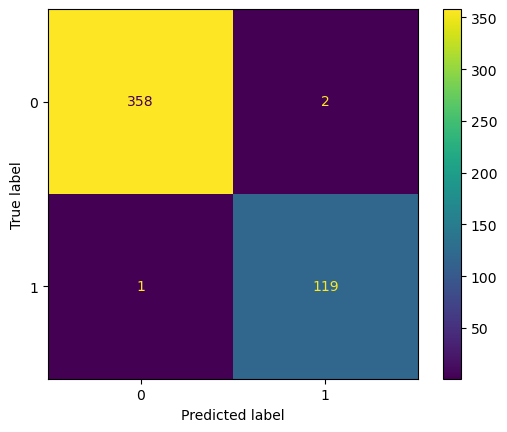

In [27]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
print(classification_report(y_test, y_pred, target_names=['human', 'bot']))

In [28]:
from joblib import dump, load

dump(clf, './model_11.joblib') 

['./model_11.joblib']

In [8]:
from sklearn.metrics import SCORERS
# sorted(SCORERS.keys())
from catboost import CatBoostClassifier

Градиентный бустинг из CatBoost:

In [47]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    eval_metric='F1',
#     task_type="GPU",
#     devices='0'
)

params_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'depth': [8, 10, 12, 14, 16, 18],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

randomized_search_result = model.randomized_search(
    params_grid,
    X=X_val,
    y=y_val,
    verbose=False,
    plot=True
)
# depth 8 lr 0.2 l2_leaf_reg 9

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9800000	test: 1.0000000	best: 1.0000000 (0)	total: 28.5ms	remaining: 28.5s
1:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 47.7ms	remaining: 23.8s
2:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 70.2ms	remaining: 23.3s
3:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 91ms	remaining: 22.7s
4:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 166ms	remaining: 33.1s
5:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 186ms	remaining: 30.8s
6:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 202ms	remaining: 28.7s
7:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 221ms	remaining: 27.5s
8:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 246ms	remaining: 27.1s
9:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 267ms	remaining: 26.4s
10:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 292ms	remaining: 26.3s
11:	learn: 0.9760766	test: 1.0000000	best: 1.000000

97:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.24s	remaining: 20.6s
98:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.26s	remaining: 20.6s
99:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.28s	remaining: 20.5s
100:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.31s	remaining: 20.6s
101:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.33s	remaining: 20.5s
102:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.37s	remaining: 20.6s
103:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.39s	remaining: 20.6s
104:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.41s	remaining: 20.5s
105:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.42s	remaining: 20.4s
106:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.44s	remaining: 20.4s
107:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.47s	remaining: 20.4s
108:	learn: 0.9760766	test: 1.00000

196:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.44s	remaining: 18.1s
197:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.47s	remaining: 18.1s
198:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.48s	remaining: 18s
199:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.5s	remaining: 18s
200:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.52s	remaining: 18s
201:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.54s	remaining: 17.9s
202:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.55s	remaining: 17.9s
203:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.57s	remaining: 17.8s
204:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.59s	remaining: 17.8s
205:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.61s	remaining: 17.8s
206:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 4.63s	remaining: 17.7s
207:	learn: 0.9760766	test: 1.0000000	b

295:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.67s	remaining: 15.9s
296:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.69s	remaining: 15.8s
297:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.71s	remaining: 15.8s
298:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.73s	remaining: 15.8s
299:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.75s	remaining: 15.8s
300:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.77s	remaining: 15.7s
301:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.79s	remaining: 15.7s
302:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.81s	remaining: 15.7s
303:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.83s	remaining: 15.6s
304:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.84s	remaining: 15.6s
305:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 6.86s	remaining: 15.6s
306:	learn: 0.9760766	test: 1.00

390:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.67s	remaining: 13.5s
391:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.7s	remaining: 13.5s
392:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.72s	remaining: 13.5s
393:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.74s	remaining: 13.4s
394:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.77s	remaining: 13.4s
395:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.79s	remaining: 13.4s
396:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.82s	remaining: 13.4s
397:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.84s	remaining: 13.4s
398:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.86s	remaining: 13.3s
399:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.88s	remaining: 13.3s
400:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 8.9s	remaining: 13.3s
401:	learn: 0.9760766	test: 1.0000

485:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 10.9s	remaining: 11.5s
486:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 10.9s	remaining: 11.5s
487:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 10.9s	remaining: 11.4s
488:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 10.9s	remaining: 11.4s
489:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 10.9s	remaining: 11.4s
490:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 11s	remaining: 11.4s
491:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 11s	remaining: 11.4s
492:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 11s	remaining: 11.3s
493:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 11s	remaining: 11.3s
494:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 11.1s	remaining: 11.3s
495:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 11.1s	remaining: 11.3s
496:	learn: 0.9760766	test: 1.0000000	be

582:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.1s	remaining: 9.35s
583:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.1s	remaining: 9.34s
584:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.1s	remaining: 9.32s
585:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.2s	remaining: 9.29s
586:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.2s	remaining: 9.27s
587:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.2s	remaining: 9.24s
588:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.2s	remaining: 9.22s
589:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.2s	remaining: 9.2s
590:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.3s	remaining: 9.18s
591:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.3s	remaining: 9.15s
592:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 13.3s	remaining: 9.13s
593:	learn: 0.9760766	test: 1.000

676:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.3s	remaining: 7.3s
677:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.3s	remaining: 7.28s
678:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.3s	remaining: 7.26s
679:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.4s	remaining: 7.23s
680:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.4s	remaining: 7.21s
681:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.4s	remaining: 7.18s
682:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.4s	remaining: 7.16s
683:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.4s	remaining: 7.13s
684:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.5s	remaining: 7.11s
685:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.5s	remaining: 7.09s
686:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 15.5s	remaining: 7.06s
687:	learn: 0.9760766	test: 1.000

770:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.5s	remaining: 5.2s
771:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.5s	remaining: 5.17s
772:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.5s	remaining: 5.15s
773:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.6s	remaining: 5.13s
774:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.6s	remaining: 5.11s
775:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.6s	remaining: 5.09s
776:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.6s	remaining: 5.06s
777:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.7s	remaining: 5.04s
778:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.7s	remaining: 5.02s
779:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.7s	remaining: 5s
780:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 17.7s	remaining: 4.97s
781:	learn: 0.9760766	test: 1.000000

872:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20s	remaining: 2.91s
873:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20s	remaining: 2.89s
874:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20.1s	remaining: 2.87s
875:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20.1s	remaining: 2.84s
876:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20.1s	remaining: 2.82s
877:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20.1s	remaining: 2.8s
878:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20.1s	remaining: 2.77s
879:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20.2s	remaining: 2.75s
880:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20.2s	remaining: 2.73s
881:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20.2s	remaining: 2.71s
882:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 20.3s	remaining: 2.68s
883:	learn: 0.9760766	test: 1.0000000

967:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.4s	remaining: 742ms
968:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.5s	remaining: 719ms
969:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.5s	remaining: 695ms
970:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.5s	remaining: 672ms
971:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.5s	remaining: 649ms
972:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.6s	remaining: 626ms
973:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.6s	remaining: 603ms
974:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.6s	remaining: 580ms
975:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.6s	remaining: 556ms
976:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.7s	remaining: 534ms
977:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 22.7s	remaining: 511ms
978:	learn: 0.9760766	test: 1.00

63:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.33s	remaining: 34.1s
64:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.35s	remaining: 33.9s
65:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.37s	remaining: 33.6s
66:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.4s	remaining: 33.4s
67:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.46s	remaining: 33.7s
68:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.47s	remaining: 33.4s
69:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.54s	remaining: 33.7s
70:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.62s	remaining: 34.2s
71:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.63s	remaining: 34s
72:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.71s	remaining: 34.4s
73:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2.74s	remaining: 34.2s
74:	learn: 1.0000000	test: 1.0000000	best: 1.0

157:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 7.78s	remaining: 41.5s
158:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 7.84s	remaining: 41.5s
159:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 7.9s	remaining: 41.5s
160:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 7.96s	remaining: 41.5s
161:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.02s	remaining: 41.5s
162:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.08s	remaining: 41.5s
163:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.14s	remaining: 41.5s
164:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.2s	remaining: 41.5s
165:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.26s	remaining: 41.5s
166:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.31s	remaining: 41.5s
167:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.38s	remaining: 41.5s
168:	learn: 1.0000000	test: 1.0000

252:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 13.5s	remaining: 39.9s
253:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 13.6s	remaining: 39.9s
254:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 13.6s	remaining: 39.8s
255:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 13.7s	remaining: 39.8s
256:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 13.8s	remaining: 39.8s
257:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 13.8s	remaining: 39.8s
258:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 13.9s	remaining: 39.8s
259:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 14s	remaining: 39.7s
260:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 14s	remaining: 39.7s
261:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 14.1s	remaining: 39.6s
262:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 14.1s	remaining: 39.6s
263:	learn: 1.0000000	test: 1.000000

349:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.6s	remaining: 36.3s
350:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.6s	remaining: 36.3s
351:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.7s	remaining: 36.2s
352:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.7s	remaining: 36.2s
353:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.8s	remaining: 36.1s
354:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.8s	remaining: 36.1s
355:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.9s	remaining: 36s
356:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20s	remaining: 36s
357:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20s	remaining: 35.9s
358:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.1s	remaining: 35.9s
359:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.1s	remaining: 35.8s
360:	learn: 1.0000000	test: 1.0000000	be

445:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.4s	remaining: 31.6s
446:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.5s	remaining: 31.5s
447:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.6s	remaining: 31.5s
448:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.6s	remaining: 31.4s
449:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.7s	remaining: 31.4s
450:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.7s	remaining: 31.3s
451:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.8s	remaining: 31.3s
452:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.8s	remaining: 31.2s
453:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.9s	remaining: 31.2s
454:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26s	remaining: 31.1s
455:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26s	remaining: 31s
456:	learn: 1.0000000	test: 1.0000000	

541:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.1s	remaining: 26.3s
542:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.2s	remaining: 26.3s
543:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.3s	remaining: 26.2s
544:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.3s	remaining: 26.2s
545:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.4s	remaining: 26.1s
546:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.5s	remaining: 26.1s
547:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.5s	remaining: 26s
548:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.6s	remaining: 25.9s
549:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.6s	remaining: 25.9s
550:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.7s	remaining: 25.8s
551:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.8s	remaining: 25.8s
552:	learn: 1.0000000	test: 1.0000

637:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 36.9s	remaining: 20.9s
638:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37s	remaining: 20.9s
639:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37s	remaining: 20.8s
640:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.1s	remaining: 20.8s
641:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.1s	remaining: 20.7s
642:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.2s	remaining: 20.7s
643:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.3s	remaining: 20.6s
644:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.3s	remaining: 20.5s
645:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.4s	remaining: 20.5s
646:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.4s	remaining: 20.4s
647:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.5s	remaining: 20.4s
648:	learn: 1.0000000	test: 1.000000

733:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 42.6s	remaining: 15.4s
734:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 42.7s	remaining: 15.4s
735:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 42.7s	remaining: 15.3s
736:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 42.8s	remaining: 15.3s
737:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 42.9s	remaining: 15.2s
738:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 42.9s	remaining: 15.2s
739:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 43s	remaining: 15.1s
740:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 43s	remaining: 15s
741:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 43.1s	remaining: 15s
742:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 43.2s	remaining: 14.9s
743:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 43.2s	remaining: 14.9s
744:	learn: 1.0000000	test: 1.0000000	be

829:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.4s	remaining: 9.9s
830:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.4s	remaining: 9.85s
831:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.5s	remaining: 9.79s
832:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.5s	remaining: 9.73s
833:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.6s	remaining: 9.67s
834:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.6s	remaining: 9.61s
835:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.7s	remaining: 9.55s
836:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.8s	remaining: 9.5s
837:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.8s	remaining: 9.44s
838:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.9s	remaining: 9.38s
839:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 48.9s	remaining: 9.32s
840:	learn: 1.0000000	test: 1.0000

925:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.1s	remaining: 4.32s
926:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.1s	remaining: 4.26s
927:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.2s	remaining: 4.21s
928:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.3s	remaining: 4.15s
929:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.3s	remaining: 4.09s
930:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.4s	remaining: 4.03s
931:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.4s	remaining: 3.97s
932:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.5s	remaining: 3.91s
933:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.6s	remaining: 3.86s
934:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.6s	remaining: 3.8s
935:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 54.7s	remaining: 3.74s
936:	learn: 1.0000000	test: 1.000

21:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 552ms	remaining: 24.5s
22:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 611ms	remaining: 26s
23:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 652ms	remaining: 26.5s
24:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 713ms	remaining: 27.8s
25:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 730ms	remaining: 27.4s
26:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 760ms	remaining: 27.4s
27:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 820ms	remaining: 28.5s
28:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 881ms	remaining: 29.5s
29:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 904ms	remaining: 29.2s
30:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 922ms	remaining: 28.8s
31:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 982ms	remaining: 29.7s
32:	learn: 1.0000000	test: 1.0000000	best: 1.

117:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.02s	remaining: 45s
118:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.04s	remaining: 44.7s
119:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.1s	remaining: 44.7s
120:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.16s	remaining: 44.7s
121:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.21s	remaining: 44.7s
122:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.27s	remaining: 44.7s
123:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.33s	remaining: 44.7s
124:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.39s	remaining: 44.8s
125:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.45s	remaining: 44.8s
126:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.51s	remaining: 44.8s
127:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.57s	remaining: 44.8s
128:	learn: 1.0000000	test: 1.00000

213:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 11.8s	remaining: 43.5s
214:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 11.9s	remaining: 43.5s
215:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12s	remaining: 43.5s
216:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12s	remaining: 43.4s
217:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.1s	remaining: 43.4s
218:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.2s	remaining: 43.4s
219:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.2s	remaining: 43.3s
220:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.3s	remaining: 43.3s
221:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.3s	remaining: 43.2s
222:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.4s	remaining: 43.2s
223:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.5s	remaining: 43.2s
224:	learn: 1.0000000	test: 1.000000

309:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.6s	remaining: 39.1s
310:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.6s	remaining: 39.1s
311:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.7s	remaining: 39s
312:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.8s	remaining: 39s
313:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.8s	remaining: 38.9s
314:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.9s	remaining: 38.9s
315:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.9s	remaining: 38.8s
316:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18s	remaining: 38.8s
317:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.1s	remaining: 38.7s
318:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.1s	remaining: 38.7s
319:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.2s	remaining: 38.6s
320:	learn: 1.0000000	test: 1.0000000	

404:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.3s	remaining: 34.3s
405:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.4s	remaining: 34.2s
406:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.4s	remaining: 34.1s
407:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.5s	remaining: 34.1s
408:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.6s	remaining: 34s
409:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.6s	remaining: 34s
410:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.7s	remaining: 33.9s
411:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.7s	remaining: 33.9s
412:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.8s	remaining: 33.8s
413:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.9s	remaining: 33.8s
414:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.9s	remaining: 33.7s
415:	learn: 1.0000000	test: 1.000000

500:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.1s	remaining: 29s
501:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.2s	remaining: 28.9s
502:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.2s	remaining: 28.9s
503:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.3s	remaining: 28.8s
504:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.4s	remaining: 28.8s
505:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.4s	remaining: 28.7s
506:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.5s	remaining: 28.7s
507:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.5s	remaining: 28.6s
508:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.6s	remaining: 28.5s
509:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.6s	remaining: 28.5s
510:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.7s	remaining: 28.4s
511:	learn: 1.0000000	test: 1.0000

595:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35s	remaining: 23.7s
596:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35s	remaining: 23.7s
597:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.1s	remaining: 23.6s
598:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.2s	remaining: 23.6s
599:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.2s	remaining: 23.5s
600:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.3s	remaining: 23.4s
601:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.4s	remaining: 23.4s
602:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.4s	remaining: 23.3s
603:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.5s	remaining: 23.3s
604:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.5s	remaining: 23.2s
605:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.6s	remaining: 23.1s
606:	learn: 1.0000000	test: 1.000000

692:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41s	remaining: 18.2s
693:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.1s	remaining: 18.1s
694:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.1s	remaining: 18.1s
695:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.2s	remaining: 18s
696:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.3s	remaining: 17.9s
697:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.3s	remaining: 17.9s
698:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.4s	remaining: 17.8s
699:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.4s	remaining: 17.8s
700:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.5s	remaining: 17.7s
701:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.5s	remaining: 17.6s
702:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 41.6s	remaining: 17.6s
703:	learn: 1.0000000	test: 1.000000

788:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.1s	remaining: 12.6s
789:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.2s	remaining: 12.5s
790:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.2s	remaining: 12.5s
791:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.3s	remaining: 12.4s
792:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.3s	remaining: 12.4s
793:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.4s	remaining: 12.3s
794:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.5s	remaining: 12.2s
795:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.5s	remaining: 12.2s
796:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.6s	remaining: 12.1s
797:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.6s	remaining: 12.1s
798:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 47.7s	remaining: 12s
799:	learn: 1.0000000	test: 1.0000

883:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 52.9s	remaining: 6.94s
884:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 52.9s	remaining: 6.88s
885:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53s	remaining: 6.82s
886:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53s	remaining: 6.76s
887:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.1s	remaining: 6.7s
888:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.2s	remaining: 6.64s
889:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.2s	remaining: 6.58s
890:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.3s	remaining: 6.52s
891:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.4s	remaining: 6.46s
892:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.4s	remaining: 6.4s
893:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.5s	remaining: 6.34s
894:	learn: 1.0000000	test: 1.0000000	

978:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 58.7s	remaining: 1.26s
979:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 58.7s	remaining: 1.2s
980:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 58.8s	remaining: 1.14s
981:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 58.8s	remaining: 1.08s
982:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 58.9s	remaining: 1.02s
983:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 59s	remaining: 959ms
984:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 59s	remaining: 899ms
985:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 59.1s	remaining: 839ms
986:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 59.1s	remaining: 779ms
987:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 59.2s	remaining: 719ms
988:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 59.3s	remaining: 659ms
989:	learn: 1.0000000	test: 1.0000000

75:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 1.95s	remaining: 23.7s
76:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 1.97s	remaining: 23.6s
77:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2s	remaining: 23.6s
78:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.02s	remaining: 23.5s
79:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.05s	remaining: 23.6s
80:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.08s	remaining: 23.5s
81:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.09s	remaining: 23.4s
82:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.11s	remaining: 23.3s
83:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.14s	remaining: 23.4s
84:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.16s	remaining: 23.3s
85:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.19s	remaining: 23.2s
86:	learn: 0.9760766	test: 1.0000000	best: 1.0

171:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.01s	remaining: 24.1s
172:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.03s	remaining: 24s
173:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.04s	remaining: 23.9s
174:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.07s	remaining: 23.9s
175:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.1s	remaining: 23.9s
176:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.11s	remaining: 23.8s
177:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.13s	remaining: 23.7s
178:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.15s	remaining: 23.6s
179:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.18s	remaining: 23.6s
180:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.2s	remaining: 23.5s
181:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.23s	remaining: 23.5s
182:	learn: 0.9902913	test: 1.000000

267:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 8.87s	remaining: 24.2s
268:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 8.89s	remaining: 24.2s
269:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 8.91s	remaining: 24.1s
270:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 9.02s	remaining: 24.3s
271:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 9.04s	remaining: 24.2s
272:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 9.06s	remaining: 24.1s
273:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 9.1s	remaining: 24.1s
274:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 9.12s	remaining: 24s
275:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 9.15s	remaining: 24s
276:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 9.17s	remaining: 23.9s
277:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 9.19s	remaining: 23.9s
278:	learn: 0.9951220	test: 1.0000000

364:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 13.8s	remaining: 23.9s
365:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 13.8s	remaining: 23.9s
366:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 13.8s	remaining: 23.8s
367:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 14s	remaining: 24.1s
368:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 14.1s	remaining: 24.2s
369:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 14.2s	remaining: 24.1s
370:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 14.2s	remaining: 24.1s
371:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 14.2s	remaining: 24s
372:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 14.2s	remaining: 23.9s
373:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 14.3s	remaining: 23.9s
374:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 14.3s	remaining: 23.8s
375:	learn: 1.0000000	test: 1.000000

462:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.6s	remaining: 23.9s
463:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.7s	remaining: 23.9s
464:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.7s	remaining: 23.8s
465:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21s	remaining: 24s
466:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.1s	remaining: 24.1s
467:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.2s	remaining: 24.1s
468:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.2s	remaining: 24s
469:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.2s	remaining: 23.9s
470:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.4s	remaining: 24.1s
471:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.5s	remaining: 24s
472:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.7s	remaining: 24.2s
473:	learn: 1.0000000	test: 1.0000000	be

557:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.1s	remaining: 23.1s
558:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.2s	remaining: 23s
559:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.2s	remaining: 22.9s
560:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.2s	remaining: 22.9s
561:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.2s	remaining: 22.8s
562:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.3s	remaining: 22.7s
563:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.4s	remaining: 22.8s
564:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.5s	remaining: 22.7s
565:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.5s	remaining: 22.6s
566:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.5s	remaining: 22.5s
567:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 29.5s	remaining: 22.5s
568:	learn: 1.0000000	test: 1.0000

651:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 37.9s	remaining: 20.2s
652:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38s	remaining: 20.2s
653:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38s	remaining: 20.1s
654:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38s	remaining: 20s
655:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38.2s	remaining: 20s
656:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38.2s	remaining: 20s
657:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38.3s	remaining: 19.9s
658:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38.5s	remaining: 19.9s
659:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38.5s	remaining: 19.8s
660:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38.6s	remaining: 19.8s
661:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 38.8s	remaining: 19.8s
662:	learn: 1.0000000	test: 1.0000000	best: 

746:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 49s	remaining: 16.6s
747:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 49s	remaining: 16.5s
748:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 49.3s	remaining: 16.5s
749:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 49.3s	remaining: 16.4s
750:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 49.6s	remaining: 16.4s
751:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 49.8s	remaining: 16.4s
752:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 50s	remaining: 16.4s
753:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 50s	remaining: 16.3s
754:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 50.2s	remaining: 16.3s
755:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 50.4s	remaining: 16.3s
756:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 50.6s	remaining: 16.2s
757:	learn: 1.0000000	test: 1.0000000	be

841:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 1s	remaining: 11.6s
842:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 11.6s
843:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 11.5s
844:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 11.4s
845:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 11.3s
846:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 11.3s
847:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 11.2s
848:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 11.2s
849:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 11.1s
850:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 11s
851:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 3s	remaining: 11s
852:	learn: 1.0000000	test: 1.000000

934:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 15s	remaining: 5.28s
935:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 16s	remaining: 5.2s
936:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 16s	remaining: 5.12s
937:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 16s	remaining: 5.04s
938:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 16s	remaining: 4.97s
939:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 16s	remaining: 4.89s
940:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 16s	remaining: 4.82s
941:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 17s	remaining: 4.74s
942:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 17s	remaining: 4.67s
943:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 17s	remaining: 4.59s
944:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 17s	remaining: 4.51s
945:	learn: 1.0000000	

33:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 871ms	remaining: 24.8s
34:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 897ms	remaining: 24.7s
35:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 915ms	remaining: 24.5s
36:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 934ms	remaining: 24.3s
37:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 977ms	remaining: 24.7s
38:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 998ms	remaining: 24.6s
39:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 1.02s	remaining: 24.4s
40:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 1.04s	remaining: 24.4s
41:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 1.09s	remaining: 24.9s
42:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 1.13s	remaining: 25.1s
43:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 1.15s	remaining: 25s
44:	learn: 0.9760766	test: 1.0000000	best: 1.

132:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 4.83s	remaining: 31.5s
133:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 4.88s	remaining: 31.5s
134:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 4.91s	remaining: 31.4s
135:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 4.93s	remaining: 31.3s
136:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 4.95s	remaining: 31.2s
137:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 4.97s	remaining: 31s
138:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 4.99s	remaining: 30.9s
139:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.02s	remaining: 30.9s
140:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.07s	remaining: 30.9s
141:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.11s	remaining: 30.9s
142:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.14s	remaining: 30.8s
143:	learn: 0.9902913	test: 1.0000

229:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 10.8s	remaining: 36.2s
230:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 10.8s	remaining: 36.1s
231:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 11.3s	remaining: 37.3s
232:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 11.4s	remaining: 37.4s
233:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 11.4s	remaining: 37.3s
234:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 11.4s	remaining: 37.2s
235:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 11.5s	remaining: 37.1s
236:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 11.5s	remaining: 37s
237:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 11.9s	remaining: 38.1s
238:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 11.9s	remaining: 37.9s
239:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12s	remaining: 37.9s
240:	learn: 1.0000000	test: 1.000000

323:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.2s	remaining: 37.9s
324:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.9s	remaining: 39.2s
325:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.6s	remaining: 40.5s
326:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.6s	remaining: 40.4s
327:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.7s	remaining: 40.4s
328:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.4s	remaining: 41.6s
329:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.5s	remaining: 41.6s
330:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.5s	remaining: 41.4s
331:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.5s	remaining: 41.3s
332:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.5s	remaining: 41.1s
333:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.6s	remaining: 41s
334:	learn: 1.0000000	test: 1.0000

421:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.1s	remaining: 42.7s
422:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.2s	remaining: 42.5s
423:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.2s	remaining: 42.4s
424:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.2s	remaining: 42.2s
425:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.2s	remaining: 42.1s
426:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.3s	remaining: 42s
427:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 31.3s	remaining: 41.8s
428:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 32s	remaining: 42.5s
429:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 32s	remaining: 42.4s
430:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 32s	remaining: 42.3s
431:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 32s	remaining: 42.1s
432:	learn: 1.0000000	test: 1.0000000	best

515:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 51.2s	remaining: 48s
516:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 51.9s	remaining: 48.4s
517:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 51.9s	remaining: 48.3s
518:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 51.9s	remaining: 48.1s
519:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 52s	remaining: 48s
520:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 52.2s	remaining: 48s
521:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 52.6s	remaining: 48.1s
522:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 52.6s	remaining: 48s
523:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 52.6s	remaining: 47.8s
524:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.3s	remaining: 48.2s
525:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.3s	remaining: 48s
526:	learn: 1.0000000	test: 1.0000000	best: 

609:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 12s	remaining: 46.4s
610:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 12s	remaining: 46.2s
611:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 12s	remaining: 46s
612:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 12s	remaining: 45.9s
613:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 13s	remaining: 46.1s
614:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 14s	remaining: 46.3s
615:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 14s	remaining: 46.2s
616:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 14s	remaining: 46.4s
617:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 14s	remaining: 46.2s
618:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 14s	remaining: 46.1s
619:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 15s	remaining: 46.3s
620:	learn: 1.0000000	t

702:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 36s	remaining: 40.7s
703:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 36s	remaining: 40.8s
704:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 36s	remaining: 40.6s
705:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 37s	remaining: 40.4s
706:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 37s	remaining: 40.5s
707:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 37s	remaining: 40.3s
708:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 37s	remaining: 40.1s
709:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 37s	remaining: 39.9s
710:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 40s
711:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 39.9s
712:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 39s	remaining: 39.9s
713:	learn: 1.0000000	t

795:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 16s	remaining: 35.1s
796:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 16s	remaining: 34.9s
797:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 17s	remaining: 34.8s
798:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 18s	remaining: 34.8s
799:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 19s	remaining: 34.8s
800:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 19s	remaining: 34.8s
801:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 20s	remaining: 34.7s
802:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 21s	remaining: 34.7s
803:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 22s	remaining: 34.6s
804:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 22s	remaining: 34.6s
805:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 23s	remaining: 34.6s
806:	learn: 1.0000000

888:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 9s	remaining: 23.7s
889:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 10s	remaining: 23.5s
890:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 10s	remaining: 23.3s
891:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 11s	remaining: 23.1s
892:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 11s	remaining: 23s
893:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 12s	remaining: 22.8s
894:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 13s	remaining: 22.7s
895:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 13s	remaining: 22.5s
896:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 14s	remaining: 22.3s
897:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 14s	remaining: 22.1s
898:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 3m 15s	remaining: 21.9s
899:	learn: 1.0000000	te

981:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 6s	remaining: 4.52s
982:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 7s	remaining: 4.28s
983:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 8s	remaining: 4.03s
984:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 8s	remaining: 3.79s
985:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 9s	remaining: 3.54s
986:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 10s	remaining: 3.29s
987:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 10s	remaining: 3.05s
988:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 11s	remaining: 2.8s
989:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 12s	remaining: 2.55s
990:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 12s	remaining: 2.3s
991:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 4m 13s	remaining: 2.04s
992:	learn: 1.0000000	test: 

83:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.35s	remaining: 25.6s
84:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.39s	remaining: 25.7s
85:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.41s	remaining: 25.6s
86:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.43s	remaining: 25.5s
87:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.46s	remaining: 25.5s
88:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.48s	remaining: 25.4s
89:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.5s	remaining: 25.3s
90:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.52s	remaining: 25.2s
91:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.55s	remaining: 25.2s
92:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.57s	remaining: 25.1s
93:	learn: 0.9760766	test: 1.0000000	best: 1.0000000 (0)	total: 2.59s	remaining: 25s
94:	learn: 0.9760766	test: 1.0000000	best: 1.0

177:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.37s	remaining: 24.8s
178:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.39s	remaining: 24.7s
179:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.43s	remaining: 24.7s
180:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.46s	remaining: 24.7s
181:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.48s	remaining: 24.6s
182:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.51s	remaining: 24.6s
183:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.52s	remaining: 24.5s
184:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.55s	remaining: 24.4s
185:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.57s	remaining: 24.4s
186:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.68s	remaining: 24.7s
187:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 5.81s	remaining: 25.1s
188:	learn: 0.9902913	test: 1.00

271:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 10.6s	remaining: 28.5s
272:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 10.7s	remaining: 28.4s
273:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 10.7s	remaining: 28.3s
274:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 10.8s	remaining: 28.4s
275:	learn: 0.9902913	test: 1.0000000	best: 1.0000000 (0)	total: 10.8s	remaining: 28.3s
276:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 10.8s	remaining: 28.2s
277:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 10.9s	remaining: 28.2s
278:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 10.9s	remaining: 28.1s
279:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 11.6s	remaining: 29.7s
280:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 11.6s	remaining: 29.6s
281:	learn: 0.9951220	test: 1.0000000	best: 1.0000000 (0)	total: 11.6s	remaining: 29.6s
282:	learn: 0.9951220	test: 1.00

366:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.7s	remaining: 35.6s
367:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.7s	remaining: 35.5s
368:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.4s	remaining: 36.5s
369:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.4s	remaining: 36.4s
370:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.4s	remaining: 36.3s
371:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.4s	remaining: 36.2s
372:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.5s	remaining: 36.1s
373:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.5s	remaining: 35.9s
374:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.5s	remaining: 35.8s
375:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.5s	remaining: 35.7s
376:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 21.6s	remaining: 35.7s
377:	learn: 1.0000000	test: 1.00

KeyboardInterrupt: 

In [52]:
model = CatBoostClassifier(
    eval_metric='F1',
    learning_rate=0.2,
    depth=8,
    l2_leaf_reg=9
#     task_type="GPU",
#     devices='0'
)
model.fit(X_train, y_train,
         eval_set=(X_val, y_val),
          verbose=False, plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Кросс-валидация:

In [9]:
import catboost
from catboost import * 
from catboost import cv

params = {
    'loss_function': 'Logloss', 
    'iterations': 200,
    'custom_loss': 'F1',
    'random_seed': 63,
    'learning_rate': 0.2,
    'depth': 8,
    'l2_leaf_reg': 9,
}

cv_data = cv(
    params=params,
    pool=Pool(X_val, label=y_val),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True, 
    verbose=False
)

best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])
print("Best validation Logloss score, stratified: {:.4f}+/-{:.3f} on step {}".format(
best_value, cv_data['test-Logloss-std'][best_iter], best_iter))
best_value = np.min(cv_data['test-F1-mean'])
best_iter = np.argmin(cv_data['test-F1-mean'])
print("Best validation F1 score, stratified: {:.4f}+/-{:.3f} on step {}".format(
best_value, cv_data['test-F1-std'][best_iter], best_iter))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.08029298855
bestIteration = 13

Training on fold [1/5]

bestTest = 0.003966121235
bestIteration = 198

Training on fold [2/5]

bestTest = 0.00405982112
bestIteration = 199

Training on fold [3/5]

bestTest = 0.007809156104
bestIteration = 199

Training on fold [4/5]

bestTest = 0.02328635196
bestIteration = 24

Best validation Logloss score, stratified: 0.0299+/-0.036 on step 53
Best validation F1 score, stratified: 0.9758+/-0.026 on step 28


In [53]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

       human       1.00      0.99      1.00       348
         bot       0.99      1.00      0.99       132

    accuracy                           1.00       480
   macro avg       0.99      1.00      0.99       480
weighted avg       1.00      1.00      1.00       480



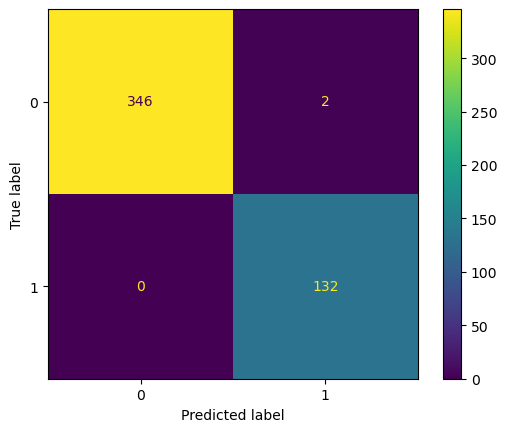

In [54]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
print(classification_report(y_test, y_pred, target_names=['human', 'bot']))

По результатам обучения на полной выборке разные классификаторы показывают точность, близкую к 100%.

2.1. Максимально логичным образом обучить качественную модель, использующую для
работы только 10 признаков из всего исходного множества.

Для сокращения пространства признаков используем алгоритм UMAP:

In [10]:
import umap

embedding = umap.UMAP(n_components=10, n_neighbors=30, min_dist=0.09).fit_transform(features)
embedding

array([[ 3.091458 , -2.1970901,  7.2406   , ..., -1.3454208,  5.6623106,
         2.8042936],
       [16.493847 ,  3.2161481,  5.4901223, ...,  5.5267262,  2.7568436,
         4.4213977],
       [-0.9550416, 10.0257635,  6.4851737, ...,  4.1322055,  5.6005135,
         5.5025916],
       ...,
       [10.1297455, 14.938101 ,  4.7294803, ...,  4.310784 ,  4.8376822,
         3.6540859],
       [10.050183 , 15.282666 ,  4.5272565, ...,  4.2491164,  4.9967694,
         3.5980542],
       [ 9.925066 , 15.462745 ,  4.4217467, ...,  4.27317  ,  5.059142 ,
         3.5622344]], dtype=float32)

In [15]:
EX_train, EX_test, ey_train, ey_test = train_test_split(embedding, target, test_size=0.2, random_state=r_state)
EX_train, EX_val, ey_train, ey_val = train_test_split(EX_train, ey_train, test_size=0.25, random_state=r_state)

In [11]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def show_roc_auc_plot(labels, predictions):
    fpr, tpr, thresholds = roc_curve(labels, predictions)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    
def show_total_report(labels, predictions):
    ConfusionMatrixDisplay(confusion_matrix(labels, predictions)).plot()
    plt.show()
    print(classification_report(labels, predictions, target_names=['human', 'bot']))
    show_roc_auc_plot(labels, predictions)

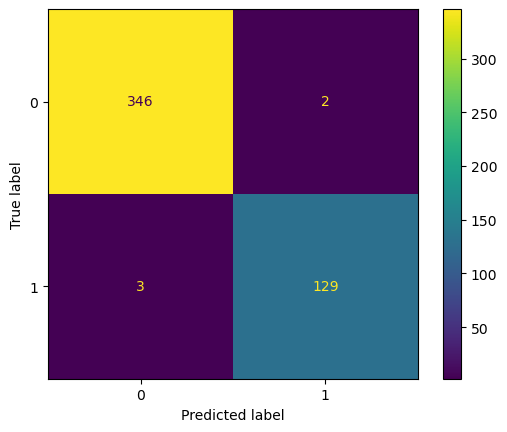

              precision    recall  f1-score   support

       human       0.99      0.99      0.99       348
         bot       0.98      0.98      0.98       132

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



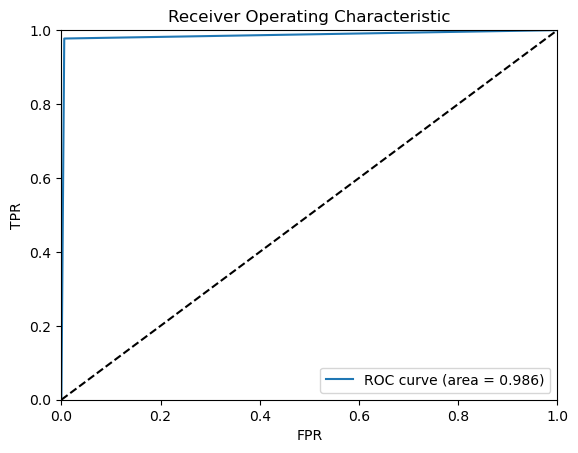

In [88]:
dtr = tree.DecisionTreeClassifier()
dtr = dtr.fit(EX_train, ey_train)
ey_pred = dtr.predict(EX_test)
show_total_report(ey_test, ey_pred)

In [67]:
import catboost
from catboost import * 
from catboost import cv

model_with_less_params = CatBoostClassifier(
    iterations=250,
    eval_metric='F1',
    learning_rate=0.2,
    depth=8,
    l2_leaf_reg=9
#     task_type="GPU",
#     devices='0'
)

model_with_less_params.fit(EX_train, ey_train,
         eval_set=(EX_val, ey_val),
          verbose=False, plot=True
)

print(f"Model is fitted: {str(model_with_less_params.is_fitted())}")
print(f"Model params: {model_with_less_params.get_params()}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params: {'iterations': 250, 'learning_rate': 0.2, 'depth': 8, 'l2_leaf_reg': 9, 'eval_metric': 'F1'}


In [68]:
ey_pred = model_with_less_params.predict(EX_test)

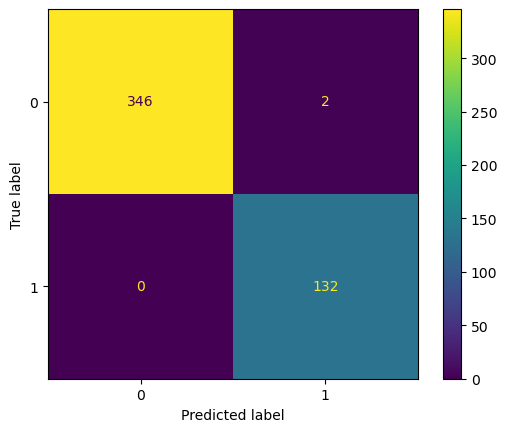

              precision    recall  f1-score   support

       human       1.00      0.99      1.00       348
         bot       0.99      1.00      0.99       132

    accuracy                           1.00       480
   macro avg       0.99      1.00      0.99       480
weighted avg       1.00      1.00      1.00       480



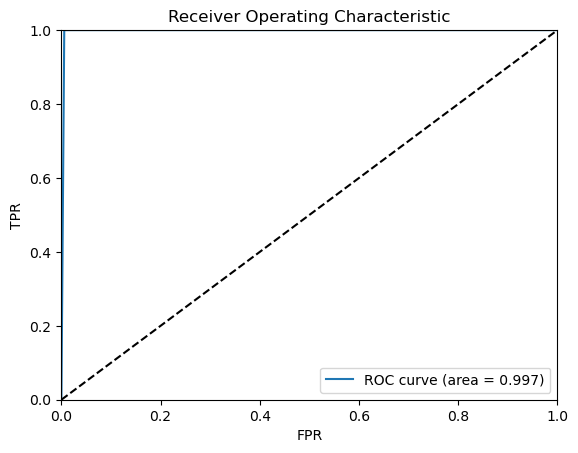

In [87]:
show_total_report(ey_test, ey_pred)

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [17]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(RandomForestClassifier(), 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(EX_val, ey_val)
rs.best_params_
rfc_3 = rs.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


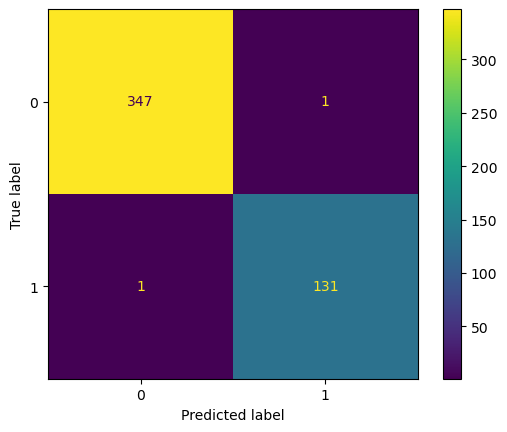

              precision    recall  f1-score   support

       human       1.00      1.00      1.00       348
         bot       0.99      0.99      0.99       132

    accuracy                           1.00       480
   macro avg       0.99      0.99      0.99       480
weighted avg       1.00      1.00      1.00       480



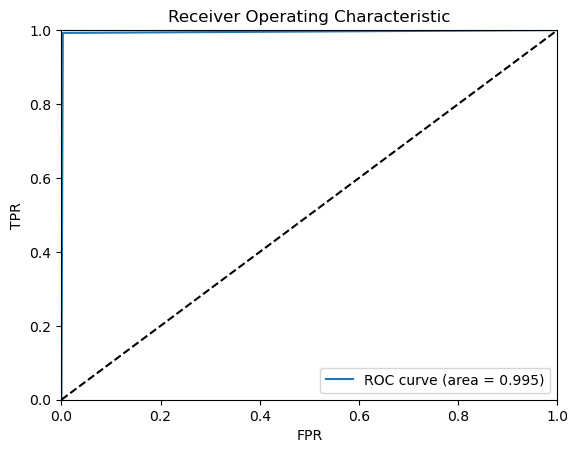

In [84]:
best_pred = rfc_3.predict(EX_test)
show_total_report(ey_test, best_pred)

C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


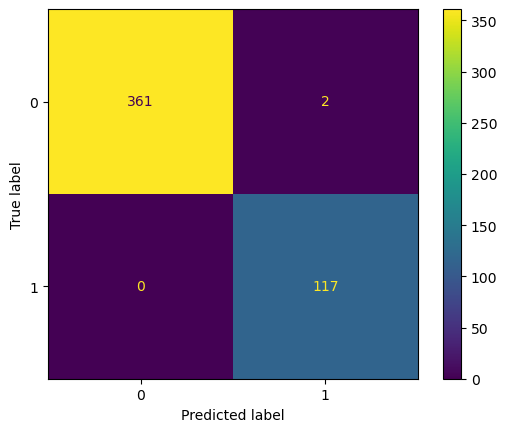

              precision    recall  f1-score   support

       human       1.00      0.99      1.00       363
         bot       0.98      1.00      0.99       117

    accuracy                           1.00       480
   macro avg       0.99      1.00      0.99       480
weighted avg       1.00      1.00      1.00       480



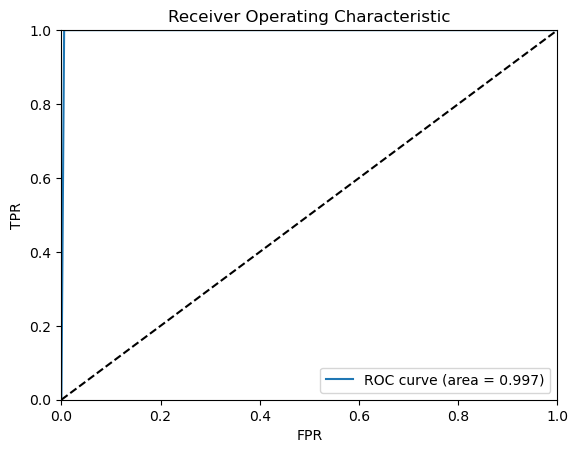

In [16]:
from sklearn import svm

svm_clf = svm.SVC(kernel='linear', C=1.0)
svm_clf = svm_clf.fit(EX_train, ey_train)
ey_pred = svm_clf.predict(EX_test)
show_total_report(ey_test, ey_pred)

Можно увидеть, что при сокращении количества признаков до 10 модели всё ещё сохраняют высокую точность классификации. Случайный лес и градиентный бустинг обеспечивают минимальную вероятность ложных срабатываний и пропуска ботов.

3.3. Выбрать один базовый тип ML-модели на свой вкус (SVM, дерево решений, случайный
лес, градиентный бустинг и пр.) и провести ROC-анализ в зависимости от её
гиперпараметров.

C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


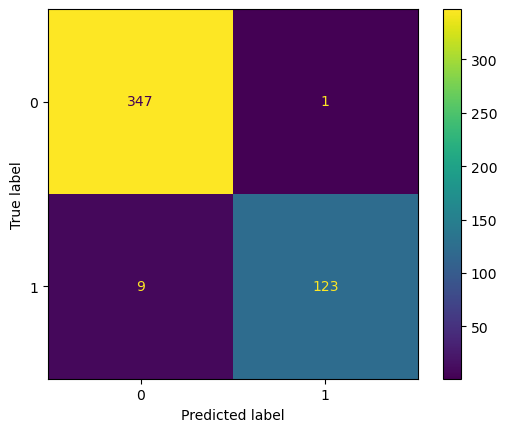

              precision    recall  f1-score   support

       human       0.97      1.00      0.99       348
         bot       0.99      0.93      0.96       132

    accuracy                           0.98       480
   macro avg       0.98      0.96      0.97       480
weighted avg       0.98      0.98      0.98       480



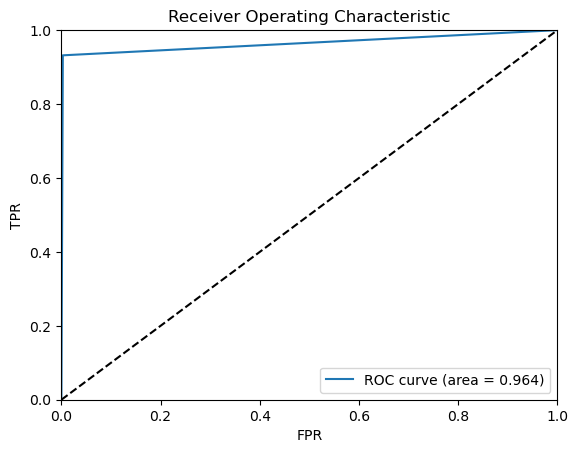

In [106]:
svm_clf = svm.SVC(gamma=0.35, C=0.01)
svm_clf = svm_clf.fit(EX_train, ey_train)
ey_pred = svm_clf.predict(EX_test)
show_total_report(ey_test, ey_pred)

C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


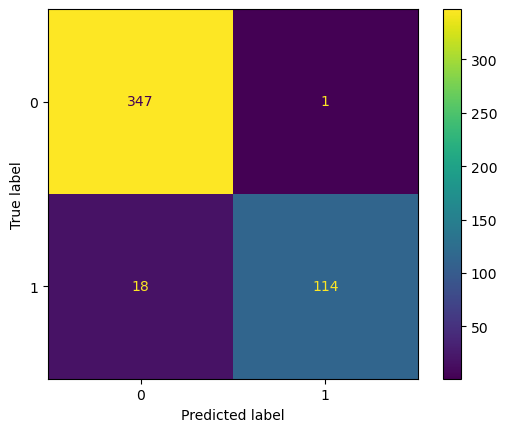

              precision    recall  f1-score   support

       human       0.95      1.00      0.97       348
         bot       0.99      0.86      0.92       132

    accuracy                           0.96       480
   macro avg       0.97      0.93      0.95       480
weighted avg       0.96      0.96      0.96       480



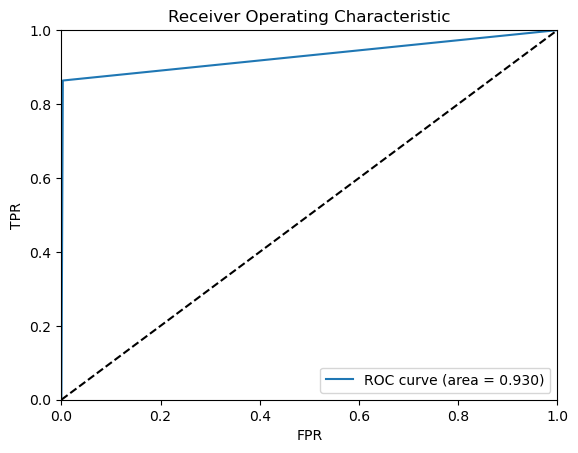

In [128]:
svm_clf = svm.SVC(kernel='rbf', C=0.00351)
svm_clf = svm_clf.fit(EX_train, ey_train)
ey_pred = svm_clf.predict(EX_test)
show_total_report(ey_test, ey_pred)

В результате ROC-анализа классификатора, использующего метод опорных векторов, было выявлено, что наибольшее влияние на результат классификации оказывает параметр регуляризации ("C").

In [108]:
from joblib import dump, load

dump(svm_clf, './model.joblib') 

['./model.joblib']

In [2]:
!pipreqsnb .

pipreqs  .


INFO: Successfully saved requirements file in .\requirements.txt
